Accuracy: 0.9555555555555556
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        40
           1       1.00      0.92      0.96        50

    accuracy                           0.96        90
   macro avg       0.95      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



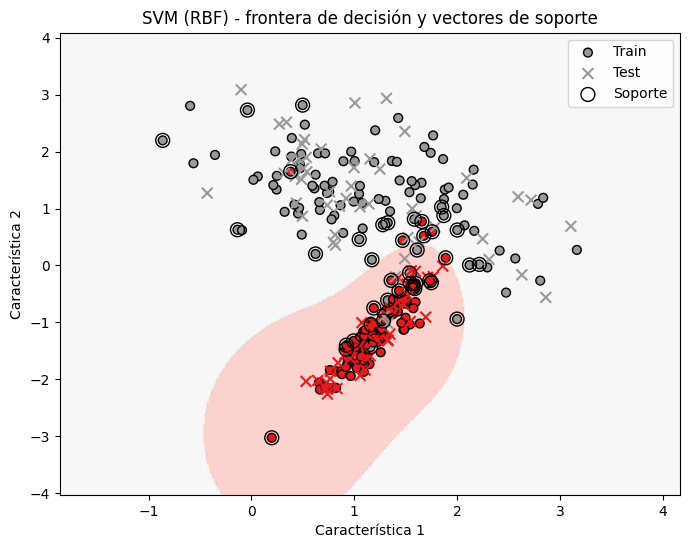

Accuracy: 0.9555555555555556
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        40
           1       1.00      0.92      0.96        50

    accuracy                           0.96        90
   macro avg       0.95      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



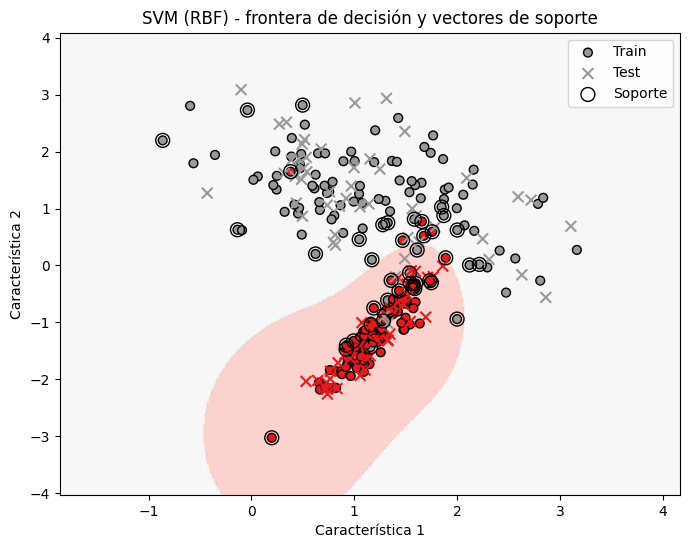

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Ejemplo sencillo de SVM (Support Vector Machine) en un Jupyter Notebook
# Genera datos sintéticos 2D, entrena un SVM con kernel RBF, muestra métricas y la frontera de decisión.

import matplotlib.pyplot as plt

# Ejemplo sencillo de SVM (Support Vector Machine) en un Jupyter Notebook
# Genera datos sintéticos 2D, entrena un SVM con kernel RBF, muestra métricas y la frontera de decisión.

import matplotlib.pyplot as plt

# Crear dataset 2D para visualización
# make_classification genera un conjunto de datos sintético:
# - n_samples: número de ejemplos
# - n_features: número de características (2 para poder plotear)
# - n_redundant: características redundantes (0 aquí)
# - n_clusters_per_class: agrupaciones por clase
# - class_sep: separación entre clases (mayor => más separables)
# - flip_y: fracción de etiquetas ruidosas
# - random_state: semilla para reproducibilidad
X, y = make_classification(
    n_samples=300, n_features=2, n_redundant=0, n_clusters_per_class=1,
    class_sep=1.2, flip_y=0.03, random_state=42
)

# Dividir y escalar
# train_test_split separa los datos en entrenamiento y prueba.
# StandardScaler centra y escala las características usando media y desviación estándar.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler().fit(X_train)
# Transformar (escalar) tanto conjunto de entrenamiento como de prueba
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# Entrenar SVM con kernel RBF
# SVC es el clasificador SVM:
# - kernel='rbf' usa el kernel gaussiano
# - C controla la penalización por error (balance bias-variance)
# - gamma en 'scale' calcula el valor automáticamente
# - random_state para reproducibilidad de algunos procedimientos internos
svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=False, random_state=42)
svm.fit(X_train_s, y_train)  # Ajustar modelo con datos escalados

# Predicción y métricas
# predict genera las etiquetas para el conjunto de prueba escalado
# accuracy_score y classification_report muestran métricas de desempeño
y_pred = svm.predict(X_test_s)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Dibujar datos y frontera de decisión
# Crear una malla 2D (xx, yy) que cubre el rango de las características originales (no escaladas)
# np.meshgrid genera una rejilla para evaluar la decisión del clasificador en todo el espacio
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 500),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 500)
)
# Flatten de la rejilla y combinación en coordenadas (grid) para predicción en batch
grid = np.c_[xx.ravel(), yy.ravel()]
# Escalar la rejilla con el mismo scaler usado para los datos de entrenamiento
grid_s = scaler.transform(grid)
# Predecir la clase para cada punto de la rejilla y dar la forma de la rejilla para contourf
Z = svm.predict(grid_s).reshape(xx.shape)

# Visualización
plt.figure(figsize=(8,6))
# contourf pinta las regiones de decisión coloreadas según las predicciones (Z)
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.6)
# Scatter de los puntos de entrenamiento (coloreados por su etiqueta)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.Set1, edgecolor='k', s=40, label='Train')
# Scatter de los puntos de prueba (marcador distinto para diferenciarlos)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.Set1, marker='x', s=60, label='Test')
# Dibujar vectores de soporte: svm.support_vectors_ están en el espacio escalado,
# se aplica scaler.inverse_transform para mostrarlos en el espacio original
sv = scaler.inverse_transform(svm.support_vectors_)
plt.scatter(sv[:,0], sv[:,1], facecolors='none', edgecolors='k', s=100, label='Soporte')
plt.legend()
plt.title('SVM (RBF) - frontera de decisión y vectores de soporte')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()
X, y = make_classification(
    n_samples=300, n_features=2, n_redundant=0, n_clusters_per_class=1,
    class_sep=1.2, flip_y=0.03, random_state=42
)

# Dividir y escalar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# Entrenar SVM con kernel RBF
svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=False, random_state=42)
svm.fit(X_train_s, y_train)

# Predicción y métricas
y_pred = svm.predict(X_test_s)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Dibujar datos y frontera de decisión
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 500),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 500)
)
grid = np.c_[xx.ravel(), yy.ravel()]
grid_s = scaler.transform(grid)
Z = svm.predict(grid_s).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.6)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.Set1, edgecolor='k', s=40, label='Train')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.Set1, marker='x', s=60, label='Test')
# Dibujar vectores de soporte (en el espacio escalado)
sv = scaler.inverse_transform(svm.support_vectors_)
plt.scatter(sv[:,0], sv[:,1], facecolors='none', edgecolors='k', s=100, label='Soporte')
plt.legend()
plt.title('SVM (RBF) - frontera de decisión y vectores de soporte')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()